In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [2]:
# Loading data
file_path = "../Housing-Capstone/database/zillow_sbux.csv"
df_housing = pd.read_csv(file_path)
df_housing

,rowcount,propertytype,lotareavalue,address,price,bedrooms,longitude,latitude,zpid,bathrooms,livingarea,sb_id,sb_id-2,store_name
0,0,SINGLE_FAMILY,0.510000,27610,251000,3.0,-78.542496,35.758920,6402949,2.0,1515.0,1,1,Harris Teeter-Apex #58
1,1,SINGLE_FAMILY,0.620000,27604,265000,3.0,-78.566910,35.827520,6416297,2.0,1251.0,2,2,Kroger-Apex #357
2,2,SINGLE_FAMILY,0.190000,27608,1352000,4.0,-78.634760,35.804733,6421830,4.0,3169.0,3,3,Super Target Apex ST-1932
3,3,SINGLE_FAMILY,0.359986,27511,510000,3.0,-78.777230,35.782860,6428563,1.0,1216.0,31,31,Harris Teeter Cary 331
4,4,SINGLE_FAMILY,0.290000,27607,560000,3.0,-78.687560,35.825516,6439560,2.0,1635.0,32,32,Cary Towne Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35,SINGLE_FAMILY,0.340000,27523,635000,4.0,-78.883300,35.759610,50116002,3.0,2337.0,258,258,RDU T1 Baggage Claim
996,36,SINGLE_FAMILY,0.040000,27614,360000,3.0,-78.590454,35.908638,50116351,3.0,1686.0,270,270,Stonehenge
997,37,SINGLE_FAMILY,0.550000,27587,482500,3.0,-78.540474,36.004005,50119795,3.0,1940.0,271,271,Teavana - Crabtree Valley Mall
998,38,SINGLE_FAMILY,0.170000,27617,549900,4.0,-78.732414,35.905746,50120492,3.0,1953.0,272,272,Capital & Spring Forest


In [3]:
df_housing = df_housing.drop(['rowcount', 'zpid', 'sb_id','sb_id-2'], axis=1)
df_housing

,propertytype,lotareavalue,address,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name
0,SINGLE_FAMILY,0.510000,27610,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58
1,SINGLE_FAMILY,0.620000,27604,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357
2,SINGLE_FAMILY,0.190000,27608,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932
3,SINGLE_FAMILY,0.359986,27511,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331
4,SINGLE_FAMILY,0.290000,27607,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center
...,...,...,...,...,...,...,...,...,...,...
995,SINGLE_FAMILY,0.340000,27523,635000,4.0,-78.883300,35.759610,3.0,2337.0,RDU T1 Baggage Claim
996,SINGLE_FAMILY,0.040000,27614,360000,3.0,-78.590454,35.908638,3.0,1686.0,Stonehenge
997,SINGLE_FAMILY,0.550000,27587,482500,3.0,-78.540474,36.004005,3.0,1940.0,Teavana - Crabtree Valley Mall
998,SINGLE_FAMILY,0.170000,27617,549900,4.0,-78.732414,35.905746,3.0,1953.0,Capital & Spring Forest


In [4]:
# Get the unique values of 'address' column
df_housing.address.unique()

array([27610, 27604, 27608, 27511, 27607, 27529, 27597, 27606, 27545,
       27587, 27613, 27513, 27592, 27518, 27615, 27616, 27603, 27519,
       27540, 27617, 27502, 27526, 27539, 27591, 27612, 27605, 27501,
       27571, 27614, 27523, 27609, 27562, 27560, 27601, 27520, 27596],
      dtype=int64)

In [5]:
df_housing['address'] = df_housing['address'].astype(float)

In [6]:
# creating a new dataframe 27613
df_27613 = df_housing[df_housing['address'] ==27613]
  
print(df_27613)

      propertytype  lotareavalue  address    price  bedrooms  longitude  \
11   SINGLE_FAMILY      0.170000  27613.0   407500       3.0 -78.708650   
13   SINGLE_FAMILY      0.260000  27613.0   470000       3.0 -78.716890   
16       TOWNHOUSE      0.030000  27613.0   321000       2.0 -78.712090   
70       TOWNHOUSE      0.050000  27613.0   377500       3.0 -78.735230   
90   SINGLE_FAMILY      0.179982  27613.0   490000       3.0 -78.750850   
101      TOWNHOUSE      0.020000  27613.0   320000       3.0 -78.735435   
102  SINGLE_FAMILY      0.279982  27613.0   900000       NaN -78.731730   
107      TOWNHOUSE      0.050000  27613.0   425300       3.0 -78.734420   
133      TOWNHOUSE      0.040000  27613.0   365000       3.0 -78.734670   
166  SINGLE_FAMILY      0.920000  27613.0  1275000       4.0 -78.699820   
224  SINGLE_FAMILY      0.250000  27613.0   365000       3.0 -78.709690   
279      TOWNHOUSE      0.080000  27613.0   612000       3.0 -78.708300   
283  SINGLE_FAMILY      0

In [ ]:
# creating a new dataframe 27587
df_27587 = df_housing[df_housing['address'] ==27587]
  
print(df_27587)

In [ ]:
# creating a new dataframe 27539
df_27539 = df_housing[df_housing['address'] ==27539]
  
print(df_27539)

In [ ]:
# creating a new dataframe '27616', '27518', '27526', '27562', '27529', '27540', '27607', '27606', '27571', '27615', '27617',
# '27513', '27603', '27591', '27519', '27592', '27545', '27604', '27523', '27511', '27609', '27610', '27502', '27614', '27601',
# '27560', '27612', '27608', '27605', '27597', '27520', '27501', '27596'
df_27616 = df_housing[df_housing['address'] ==27616]
df_27518 = df_housing[df_housing['address'] ==27518]
df_27526 = df_housing[df_housing['address'] ==27526]
df_27562 = df_housing[df_housing['address'] ==27562]
df_27529 = df_housing[df_housing['address'] ==27529]
df_27540 = df_housing[df_housing['address'] ==27540]
df_27607 = df_housing[df_housing['address'] ==27607]
df_27606 = df_housing[df_housing['address'] ==27606]
df_27571 = df_housing[df_housing['address'] ==27571]
df_27615 = df_housing[df_housing['address'] ==27615]
df_27617 = df_housing[df_housing['address'] ==27617]
df_27513 = df_housing[df_housing['address'] ==27513]
df_27603 = df_housing[df_housing['address'] ==27603]
df_27591 = df_housing[df_housing['address'] ==27591]
df_27519 = df_housing[df_housing['address'] ==27519]
df_27592 = df_housing[df_housing['address'] ==27592]
df_27545 = df_housing[df_housing['address'] ==27545]
df_27604 = df_housing[df_housing['address'] ==27604]
df_27523 = df_housing[df_housing['address'] ==27523]
df_27511 = df_housing[df_housing['address'] ==27511]
df_27609 = df_housing[df_housing['address'] ==27609]
df_27610 = df_housing[df_housing['address'] ==27610]
df_27502 = df_housing[df_housing['address'] ==27502]
df_27614 = df_housing[df_housing['address'] ==27614]
df_27601 = df_housing[df_housing['address'] ==27601]
df_27560 = df_housing[df_housing['address'] ==27560]
df_27612 = df_housing[df_housing['address'] ==27612]
df_27608 = df_housing[df_housing['address'] ==27608]
df_27605 = df_housing[df_housing['address'] ==27605]
df_27597 = df_housing[df_housing['address'] ==27597]
df_27520 = df_housing[df_housing['address'] ==27520]
df_27501 = df_housing[df_housing['address'] ==27501]
df_27596 = df_housing[df_housing['address'] ==27596]

In [ ]:
zipcode_df = [df_27616, df_27518, df_27526, df_27562, df_27529, df_27540, df_27607, df_27606, df_27571, df_27615,
              df_27617, df_27513, df_27603, df_27591, df_27519, df_27592, df_27545, df_27604, df_27523, df_27511,
              df_27609, df_27610, df_27502, df_27614, df_27601, df_27560, df_27612, df_27608, df_27605, df_27597,
              df_27520, df_27501, df_27596, df_27539, df_27587, df_27613]
print(zipcode_df)

In [7]:
df_housing['address'] = df_housing['address'].astype(str)

In [8]:
# Seperate each zipcode and assign a 1 or 0
pd.get_dummies(df_housing['address']).head()

,27501.0,27502.0,27511.0,27513.0,27518.0,27519.0,27520.0,27523.0,27526.0,27529.0,...,27607.0,27608.0,27609.0,27610.0,27612.0,27613.0,27614.0,27615.0,27616.0,27617.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Drop address column
df_housing.drop('address', axis=1).head()

,propertytype,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name
0,SINGLE_FAMILY,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58
1,SINGLE_FAMILY,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357
2,SINGLE_FAMILY,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932
3,SINGLE_FAMILY,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331
4,SINGLE_FAMILY,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center


In [10]:
# Join shuffled and dummies dataframes
df_encoded = pd.concat([df_housing.drop('address', axis=1),
                             pd.get_dummies(df_housing['address'])], axis=1)
df_encoded

,propertytype,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name,27501.0,...,27607.0,27608.0,27609.0,27610.0,27612.0,27613.0,27614.0,27615.0,27616.0,27617.0
0,SINGLE_FAMILY,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58,0,...,0,0,0,1,0,0,0,0,0,0
1,SINGLE_FAMILY,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357,0,...,0,0,0,0,0,0,0,0,0,0
2,SINGLE_FAMILY,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932,0,...,0,1,0,0,0,0,0,0,0,0
3,SINGLE_FAMILY,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331,0,...,0,0,0,0,0,0,0,0,0,0
4,SINGLE_FAMILY,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SINGLE_FAMILY,0.340000,635000,4.0,-78.883300,35.759610,3.0,2337.0,RDU T1 Baggage Claim,0,...,0,0,0,0,0,0,0,0,0,0
996,SINGLE_FAMILY,0.040000,360000,3.0,-78.590454,35.908638,3.0,1686.0,Stonehenge,0,...,0,0,0,0,0,0,1,0,0,0
997,SINGLE_FAMILY,0.550000,482500,3.0,-78.540474,36.004005,3.0,1940.0,Teavana - Crabtree Valley Mall,0,...,0,0,0,0,0,0,0,0,0,0
998,SINGLE_FAMILY,0.170000,549900,4.0,-78.732414,35.905746,3.0,1953.0,Capital & Spring Forest,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded.to_csv('df encoded.csv')

In [11]:
df_livingarea = df_encoded
df_livingarea = df_livingarea.fillna(0)
df_livingarea

,propertytype,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name,27501.0,...,27607.0,27608.0,27609.0,27610.0,27612.0,27613.0,27614.0,27615.0,27616.0,27617.0
0,SINGLE_FAMILY,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58,0,...,0,0,0,1,0,0,0,0,0,0
1,SINGLE_FAMILY,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357,0,...,0,0,0,0,0,0,0,0,0,0
2,SINGLE_FAMILY,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932,0,...,0,1,0,0,0,0,0,0,0,0
3,SINGLE_FAMILY,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331,0,...,0,0,0,0,0,0,0,0,0,0
4,SINGLE_FAMILY,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SINGLE_FAMILY,0.340000,635000,4.0,-78.883300,35.759610,3.0,2337.0,RDU T1 Baggage Claim,0,...,0,0,0,0,0,0,0,0,0,0
996,SINGLE_FAMILY,0.040000,360000,3.0,-78.590454,35.908638,3.0,1686.0,Stonehenge,0,...,0,0,0,0,0,0,1,0,0,0
997,SINGLE_FAMILY,0.550000,482500,3.0,-78.540474,36.004005,3.0,1940.0,Teavana - Crabtree Valley Mall,0,...,0,0,0,0,0,0,0,0,0,0
998,SINGLE_FAMILY,0.170000,549900,4.0,-78.732414,35.905746,3.0,1953.0,Capital & Spring Forest,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df_livingarea_enc = df_livingarea

#encode propertytype
df_livingarea_enc['propertytype'] = df_livingarea['propertytype'].astype(str)

# Seperate each propertytype and assign a 1 or 0
pd.get_dummies(df_livingarea_enc['propertytype']).head()

# Drop propertytype column
df_livingarea_enc.drop('propertytype', axis=1).head()

# Join shuffled and dummies dataframes
df_livingarea_enc = pd.concat([df_livingarea_enc.drop('propertytype', axis=1),
                             pd.get_dummies(df_livingarea_enc['propertytype'])], axis=1)
df_livingarea_enc

,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name,27501.0,27502.0,...,27615.0,27616.0,27617.0,APARTMENT,CONDO,LOT,MANUFACTURED,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
0,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.340000,635000,4.0,-78.883300,35.759610,3.0,2337.0,RDU T1 Baggage Claim,0,0,...,0,0,0,0,0,0,0,0,1,0
996,0.040000,360000,3.0,-78.590454,35.908638,3.0,1686.0,Stonehenge,0,0,...,0,0,0,0,0,0,0,0,1,0
997,0.550000,482500,3.0,-78.540474,36.004005,3.0,1940.0,Teavana - Crabtree Valley Mall,0,0,...,0,0,0,0,0,0,0,0,1,0
998,0.170000,549900,4.0,-78.732414,35.905746,3.0,1953.0,Capital & Spring Forest,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
df_livingarea_enc['APARTMENT'].value_counts()[1]

1

In [49]:
# df_livingarea_enc = df_livingarea_enc.drop(['APARTMENT', 'MULTI_FAMILY'], axis=1)
# df_livingarea_enc = df_livingarea_enc.drop(['store_name'], axis=1)
df_livingarea_enc

,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,27501.0,27502.0,27511.0,...,27613.0,27614.0,27615.0,27616.0,27617.0,CONDO,LOT,MANUFACTURED,SINGLE_FAMILY,TOWNHOUSE
0,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.340000,635000,4.0,-78.883300,35.759610,3.0,2337.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
996,0.040000,360000,3.0,-78.590454,35.908638,3.0,1686.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
997,0.550000,482500,3.0,-78.540474,36.004005,3.0,1940.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
998,0.170000,549900,4.0,-78.732414,35.905746,3.0,1953.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
import plotly.express as px
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression

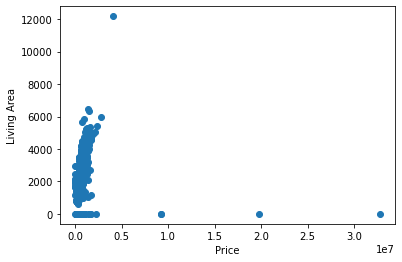

In [96]:
# Visually inspect relationship between zip and price
plt.scatter(df_livingarea_enc.price, df_livingarea_enc.livingarea)
plt.xlabel('Price')
plt.ylabel('Living Area')
plt.show()

In [105]:
# Formate data for Scikit-learn library
X = df_livingarea_enc[['bedrooms', 'bathrooms', 'lotareavalue', 'livingarea']]

In [106]:
# Assign target variable
y = df_livingarea_enc.price

In [107]:
# Create linear regression model
model = LinearRegression()

In [108]:
# Fitting the model
model.fit(X, y)

LinearRegression()

In [109]:
# Predict the model
y_pred = model.predict(X)
print(y_pred.shape)

(1000,)


ValueError: x and y must be the same size

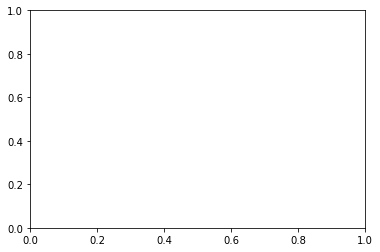

In [95]:
# Plot the model
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Price')
plt.ylabel('Living Area')

In [110]:
print(model.coef_)
print(model.intercept_)

[-4.48697451e+04 -1.41508495e+04  2.33454205e+05  2.00141167e+02]
199419.21566114156


In [111]:
train_pd, test_pd, val_pd = df_livingarea_enc[:400], df_livingarea_enc[401:799], df_livingarea_enc[800:]
len(train_pd), len(test_pd), len(val_pd)

(400, 398, 200)

In [112]:
# Train the model
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((400, 47), (400,), (200, 47), (200,), (398, 47), (398,))

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[:, :7])

def preprocessor(X):
    A = np.copy(X)
    A[:, :7] = scaler.transform(A[:, :7])
    return A

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

array([[-0.06157251, -0.21639986,  0.16046962, ...,  0.        ,
         0.        ,  1.        ],
       [-0.04731153, -0.20919025,  0.16046962, ...,  0.        ,
         0.        ,  1.        ],
       [-0.103059  ,  0.35058449,  0.82219999, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.08750156,  0.07919416, -1.8247215 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10046609,  0.01250526,  0.82219999, ...,  0.        ,
         0.        ,  1.        ],
       [-0.03305294, -0.21691484, -1.8247215 , ...,  1.        ,
         0.        ,  0.        ]])

In [114]:
pd.DataFrame(X_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.061573,-0.216400,0.160470,-0.283687,0.287556,-0.494568,-0.424753,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.047312,-0.209190,0.160470,-0.284848,0.294726,-0.494568,-0.674051,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.103059,0.350584,0.822200,-0.288073,0.292345,1.130295,1.137136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.081021,-0.083022,0.160470,-0.294846,0.290059,-1.306999,-0.707102,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.090094,-0.057273,0.160470,-0.290583,0.294517,-0.494568,-0.311436,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.097614,0.009673,1.483930,3.450035,-3.449901,1.130295,0.929388,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
396,-0.102411,0.107876,0.822200,3.450035,-3.449901,1.942727,2.001180,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,-0.087502,0.079194,-1.824722,-0.289443,0.292264,-2.119431,-0.051751,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,-0.100466,0.012505,0.822200,-0.294796,0.274223,0.317864,1.002100,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>],
       [<AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>],
       [<AxesSubplot:title={'center':'21'}>,
        <AxesSubp

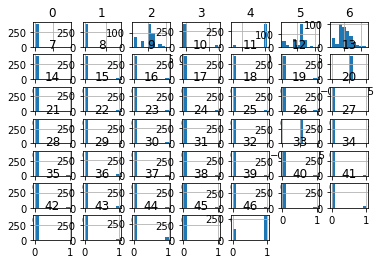

In [64]:
# Create Histogram of each column
pd.DataFrame(X_train_preprocessed).hist()

In [115]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Linear regression model
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(0.08498548732850277, 0.09397972504905261)

In [120]:
import statsmodels.api as sm

#define response variable
y = df_livingarea_enc[['price']]

#define explanatory variable
x = df_livingarea_enc[['bedrooms', 'bathrooms', 'lotareavalue', 'livingarea']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1084.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:55:56   Log-Likelihood:                -14647.
No. Observations:                1000   AIC:                         2.930e+04
Df Residuals:                     995   BIC:                         2.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.994e+05   4.83e+04      4.127   

In [71]:
df_27613.dtypes

propertytype     object
lotareavalue    float64
address         float64
price             int64
bedrooms        float64
longitude       float64
latitude        float64
bathrooms       float64
livingarea      float64
store_name       object
dtype: object

In [82]:
# df_27613 = df_27613.drop(['store_name'], axis=1)
df_27613 = df_27613.drop(['propertytype'], axis=1)

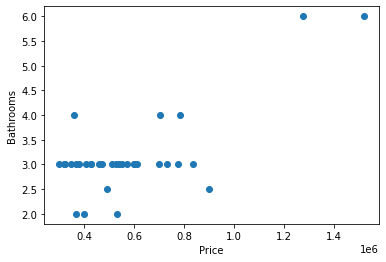

In [73]:
# Visually inspect relationship between zip and price
plt.scatter(df_27613.price, df_27613.bathrooms)
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show()

In [75]:
# Formate data for Scikit-learn library
X = df_27613.price.values.reshape(-1,1)

In [76]:
# Assign target variable
y = df_27613.bathrooms

In [77]:
# Create linear regression model
model = LinearRegression()

In [78]:
# Fitting the model
model.fit(X, y)

LinearRegression()

In [79]:
# Predict the model
y_pred = model.predict(X)
print(y_pred.shape)

(33,)


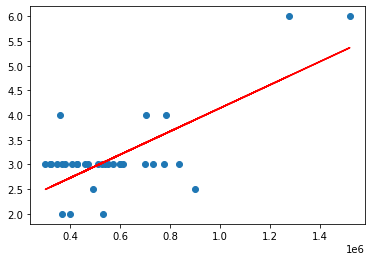

In [80]:
# Plot the model
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [81]:
print(model.coef_)
print(model.intercept_)

[2.34984861e-06]
1.7914148736110673


In [87]:
train_pd, test_pd, val_pd = df_27613[:10], df_27613[11:21], df_27613[22:]
len(train_pd), len(test_pd), len(val_pd)

(10, 10, 11)

In [ ]:
# Train the model
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

In [ ]:
pd.DataFrame(X_train_preprocessed)

In [ ]:
# Create Histogram of each column
pd.DataFrame(X_train_preprocessed).hist()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Linear regression model
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

In [ ]:
import statsmodels.api as sm

#define response variable
y = df_27607['bathrooms']

#define explanatory variable
x = df_27607[['price']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

In [ ]:
# Visually inspect relationship between zip and price
plt.scatter(df_27540.price, df_27540.lotAreaValue)
plt.xlabel('Price')
plt.ylabel('Lot Area Value')
plt.show()

In [ ]:
# Formate data for Scikit-learn library
X = df_27540.price.values.reshape(-1,1)

In [ ]:
# Assign target variable
y = df_27540.lotAreaValue

In [ ]:
# Create linear regression model
model = LinearRegression()

In [ ]:
# Fitting the model
model.fit(X, y)

In [ ]:
# Predict the model
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# Plot the model
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
train_pd, test_pd, val_pd = df_27613[:5], df_27613[10:20], df_27613[30:]
len(train_pd), len(test_pd), len(val_pd)

In [ ]:
# Train the model
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

In [ ]:
pd.DataFrame(X_train_preprocessed)

In [ ]:
# Create Histogram of each column
pd.DataFrame(X_train_preprocessed).hist()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Linear regression model
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

In [ ]:
import statsmodels.api as sm

#define response variable
y = df_27607['bathrooms']

#define explanatory variable
x = df_27607[['price']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())